In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, t

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
riskforecasting = pd.read_csv('~data/pollution_risk_forecasting.csv')
riskforecasting

,site,time,riskLevelLabel
0,ukc1101-06000,2020-05-14,0
1,ukc1101-06000,2020-05-15,0
2,ukc1101-06000,2020-05-16,0
3,ukc1101-06000,2020-05-17,0
4,ukc1101-06000,2020-05-18,0
...,...,...,...
207057,ukk4307-33900,2023-06-08,0
207058,ukk4307-33900,2023-06-09,0
207059,ukk4307-33900,2023-06-10,0
207060,ukk4307-33900,2023-06-11,0


In [4]:
feature = pd.read_csv('~data/feature_extraction_15x15.csv')
feature

,time,site,BBP_1x1_median,CDM_1x1_median,SPM_1x1_median,KD490_1x1_median,ZSD_1x1_median,CHL_1x1_median,BBP_1x1_mean,CDM_1x1_mean,...,SPM_15x15_q1,KD490_15x15_q1,ZSD_15x15_q1,CHL_15x15_q1,BBP_15x15_q3,CDM_15x15_q3,SPM_15x15_q3,KD490_15x15_q3,ZSD_15x15_q3,CHL_15x15_q3
0,2020-01-01,ukc1101-06000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-01,ukc1101-06100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-01,ukc1101-06200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-01,ukc1202-06300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.218511,0.155469,4.414686,2.392838,NaN,NaN,2.355747,0.164187,4.705874,2.620098
4,2020-01-01,ukc1202-06400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.088109,0.147391,4.552876,2.188390,NaN,NaN,2.351558,0.159994,5.009740,2.510444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471275,2022-12-31,ukk4306-22800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
471276,2022-12-31,ukk4306-22900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
471277,2022-12-31,ukk4306-23000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
471278,2022-12-31,ukk4307-33800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print(feature.shape)
print(feature.isnull().sum()) 

(471280, 194)
time                   0
site                   0
BBP_1x1_median    468655
CDM_1x1_median    468655
SPM_1x1_median    379912
                   ...  
CDM_15x15_q3      395119
SPM_15x15_q3      203541
KD490_15x15_q3    204056
ZSD_15x15_q3      204056
CHL_15x15_q3      204056
Length: 194, dtype: int64


## Missing Data

In [6]:
missing_values = [f for f in feature.columns if feature[f].isnull().sum() > 1]

for f in missing_values:
    print(f"{f} {np.round(feature[f].isnull().mean(), 4)}% missing values")

BBP_1x1_median 0.9944% missing values
CDM_1x1_median 0.9944% missing values
SPM_1x1_median 0.8061% missing values
KD490_1x1_median 0.8744% missing values
ZSD_1x1_median 0.8744% missing values
CHL_1x1_median 0.8744% missing values
BBP_1x1_mean 0.9944% missing values
CDM_1x1_mean 0.9944% missing values
SPM_1x1_mean 0.8061% missing values
KD490_1x1_mean 0.8744% missing values
ZSD_1x1_mean 0.8744% missing values
CHL_1x1_mean 0.8744% missing values
BBP_1x1_q1 0.9944% missing values
CDM_1x1_q1 0.9944% missing values
SPM_1x1_q1 0.8061% missing values
KD490_1x1_q1 0.8744% missing values
ZSD_1x1_q1 0.8744% missing values
CHL_1x1_q1 0.8744% missing values
BBP_1x1_q3 0.9944% missing values
CDM_1x1_q3 0.9944% missing values
SPM_1x1_q3 0.8061% missing values
KD490_1x1_q3 0.8744% missing values
ZSD_1x1_q3 0.8744% missing values
CHL_1x1_q3 0.8744% missing values
BBP_3x3_median 0.9754% missing values
CDM_3x3_median 0.9754% missing values
SPM_3x3_median 0.5784% missing values
KD490_3x3_median 0.6643% m

# Comparing values of all pixels from 1x1 to 15x15

In [7]:
data = []

for col in feature.columns:
    if col not in ['time', 'site']:
        feat, size_stat = col.split('_')[0], '_'.join(col.split('_')[1:])
        size, statistic = size_stat.split('_')[0], '_'.join(size_stat.split('_')[1:])
        
        mean_value = feature[col].mean()

        data.append([feat, size, statistic, mean_value])

feature_mean = pd.DataFrame(data, columns=['feature', 'size', 'statistics', 'mean'])
feature_mean

,feature,size,statistics,mean
0,BBP,1x1,median,0.038475
1,CDM,1x1,median,0.246327
2,SPM,1x1,median,14.042062
3,KD490,1x1,median,0.243490
4,ZSD,1x1,median,3.789814
...,...,...,...,...
187,CDM,15x15,q3,0.221716
188,SPM,15x15,q3,15.076954
189,KD490,15x15,q3,0.214599
190,ZSD,15x15,q3,5.118979


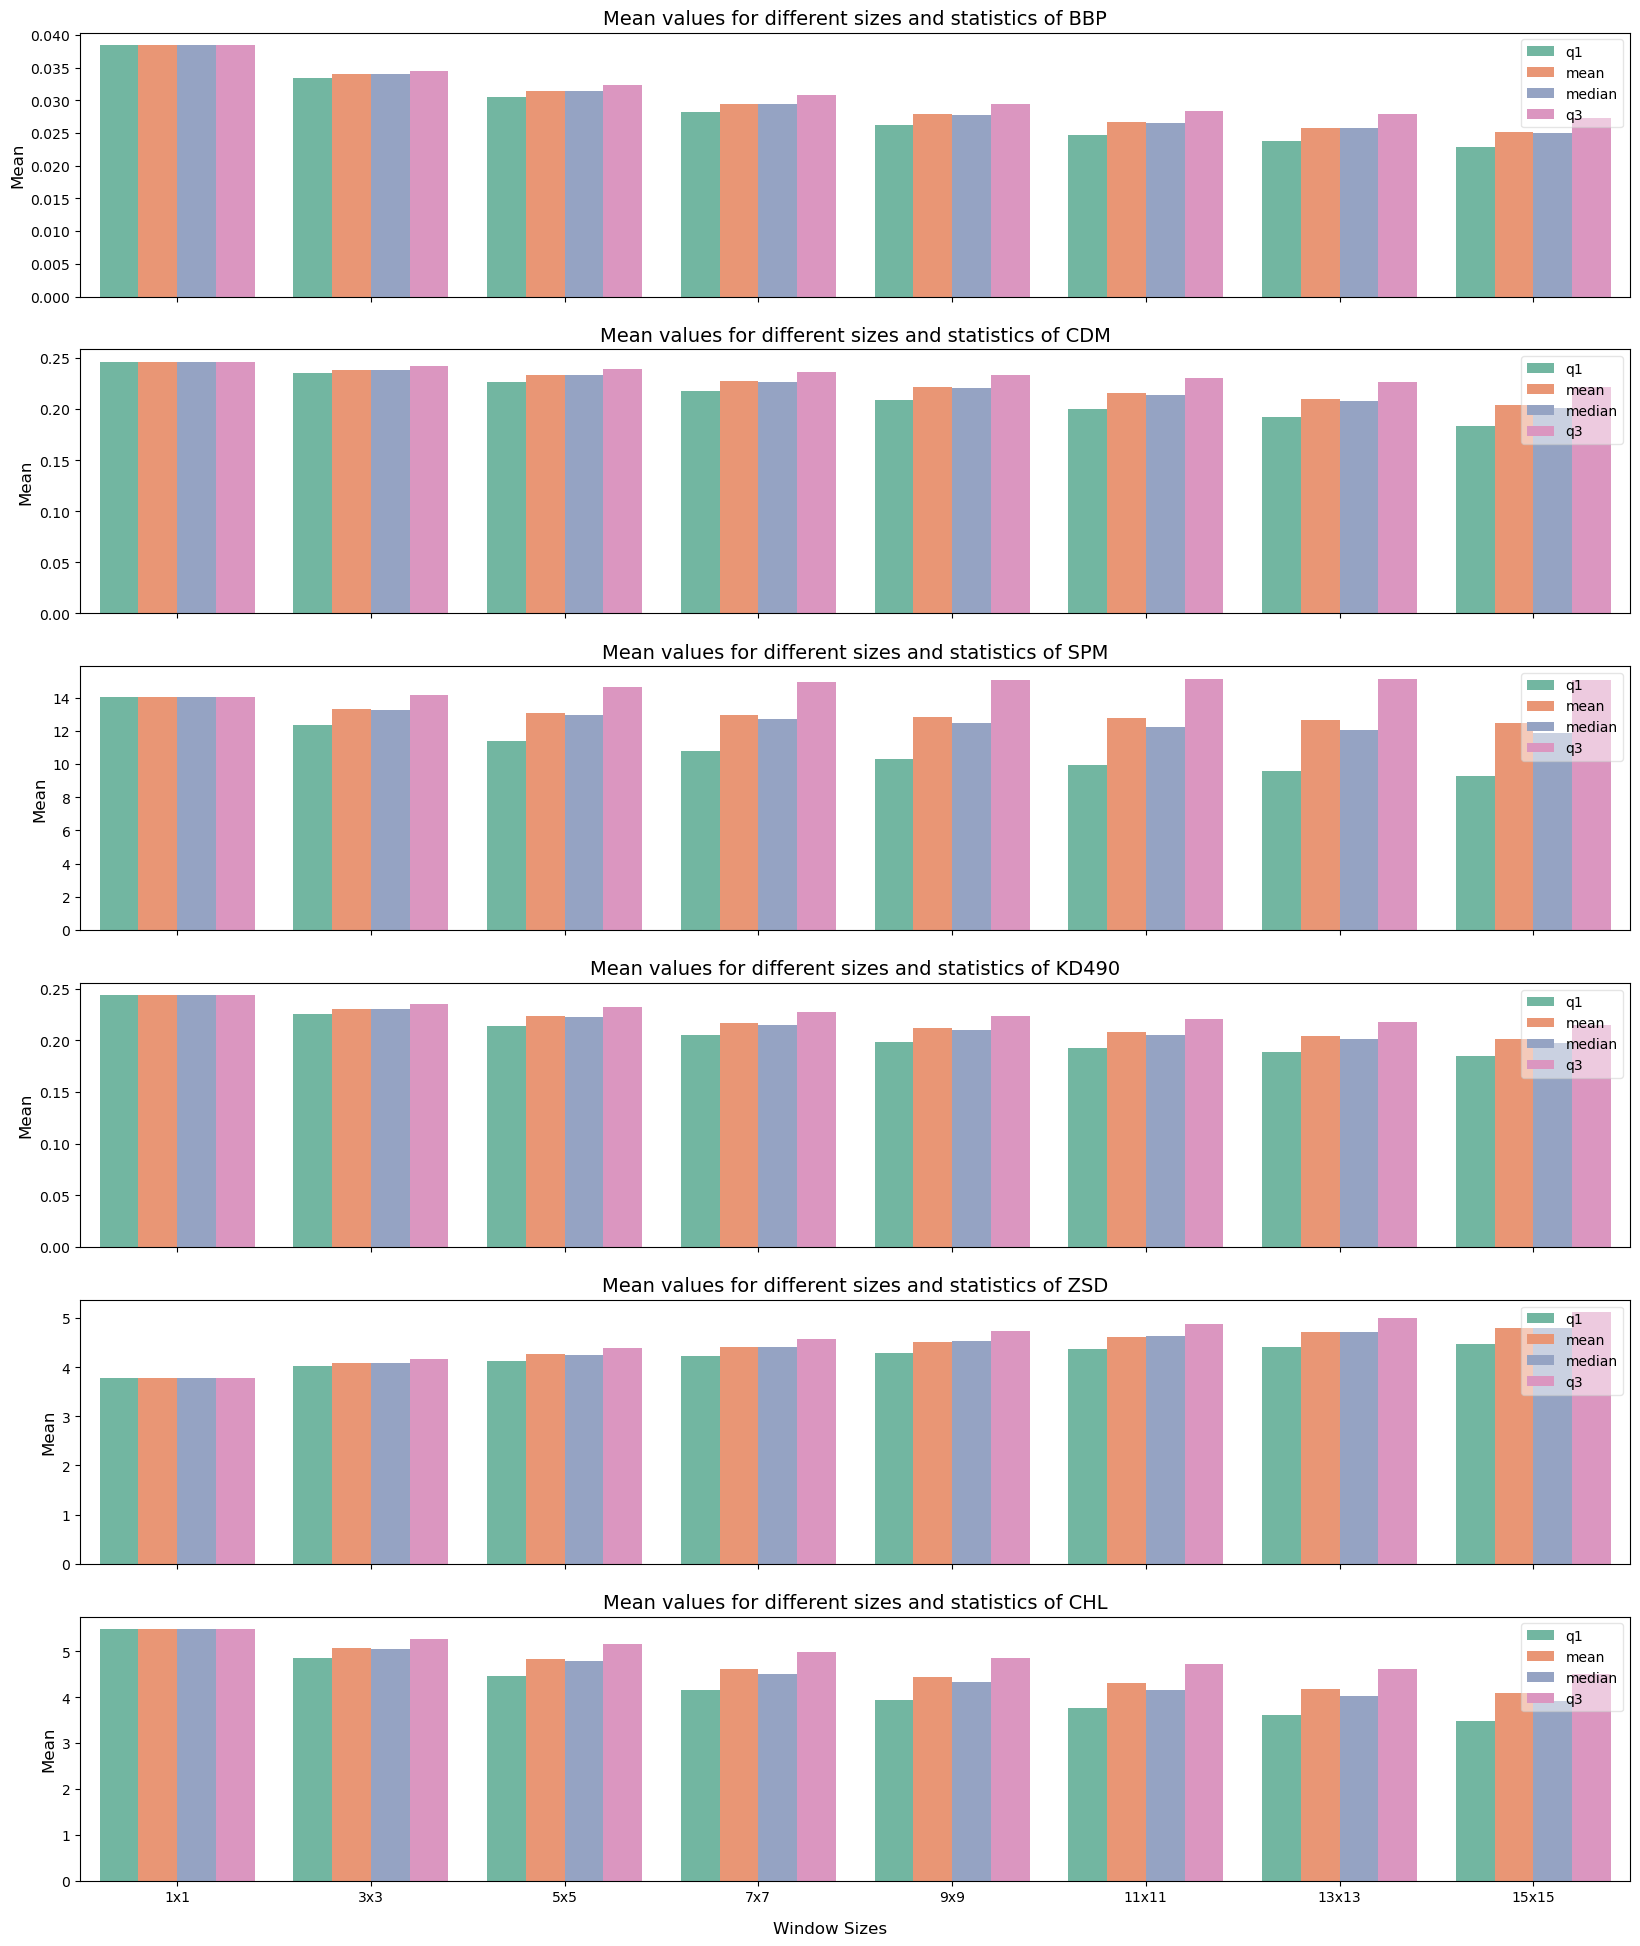

In [8]:
features = feature_mean['feature'].unique()
feature_mean['size_num'] = feature_mean['size'].apply(lambda size_str: int(size_str.split('x')[0]))

sns.set_palette("Set2")

fig, axs = plt.subplots(len(features), 1, figsize=(20, 4 * len(features)), sharex=True)

for idx, feat in enumerate(features):
    feat_data = feature_mean[feature_mean['feature'] == feat].sort_values('size_num')

    sns.barplot(x='size', y='mean', hue='statistics', data=feat_data, ax=axs[idx],
                hue_order=['q1', 'mean', 'median', 'q3'])

    axs[idx].set_title(f'Mean values for different sizes and statistics of {feat}', fontsize=14)
    axs[idx].set_xlabel('')
    axs[idx].set_ylabel('Mean', fontsize=12)
    axs[idx].legend(loc='upper right',framealpha=0.5)

fig.text(0.5, 0.09, 'Window Sizes', ha='center', va='center', fontsize=12)

plt.show()

In [9]:
feature_mean.drop(columns = ['size_num'], inplace=True)

# RiskLevelLabel vs. 6 Features
## original data(1x1)

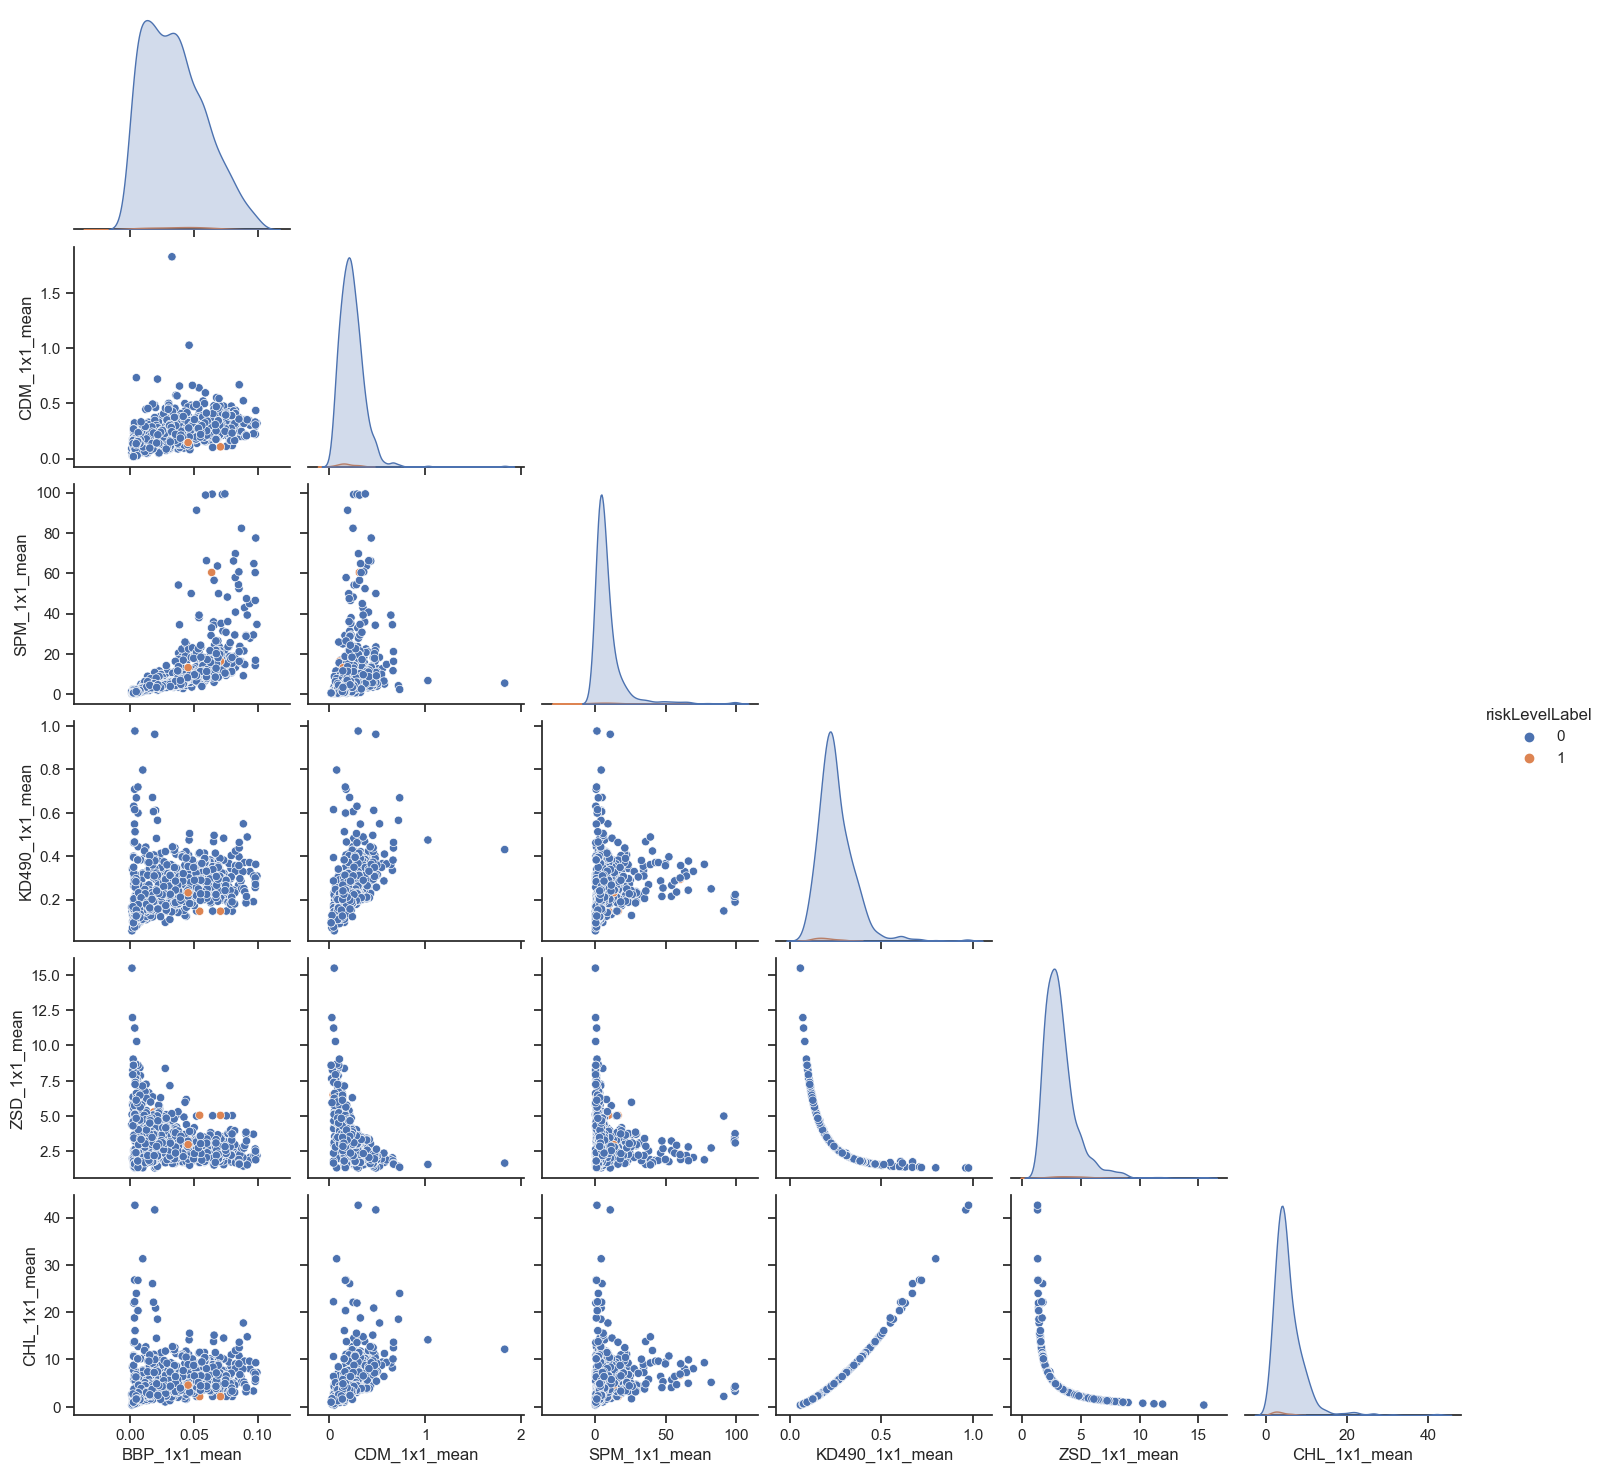

In [10]:
joined_df = riskforecasting.merge(feature, on=['time', 'site'], how='inner')
corr_columns = ['riskLevelLabel'] + [col for col in joined_df.columns if col.endswith('1x1_mean')]
subset_df = joined_df[corr_columns].dropna()

sns.set(style='ticks')
sns.pairplot(subset_df, hue='riskLevelLabel', corner=True)

plt.show()

In [11]:
# Pearson Correlation
subset_df.corr(method='pearson')

,riskLevelLabel,BBP_1x1_mean,CDM_1x1_mean,SPM_1x1_mean,KD490_1x1_mean,ZSD_1x1_mean,CHL_1x1_mean
riskLevelLabel,1.000000,0.012646,-0.044472,0.026953,-0.064565,0.060796,-0.057079
BBP_1x1_mean,0.012646,1.000000,0.438836,0.630434,0.228880,-0.401030,0.154568
CDM_1x1_mean,-0.044472,0.438836,1.000000,0.261871,0.523927,-0.539502,0.458997
SPM_1x1_mean,0.026953,0.630434,0.261871,1.000000,0.142083,-0.218543,0.103451
KD490_1x1_mean,-0.064565,0.228880,0.523927,0.142083,1.000000,-0.758161,0.982839
ZSD_1x1_mean,0.060796,-0.401030,-0.539502,-0.218543,-0.758161,1.000000,-0.647632
CHL_1x1_mean,-0.057079,0.154568,0.458997,0.103451,0.982839,-0.647632,1.000000


In [12]:
# Kendall Correlation
subset_df.corr(method='kendall')

,riskLevelLabel,BBP_1x1_mean,CDM_1x1_mean,SPM_1x1_mean,KD490_1x1_mean,ZSD_1x1_mean,CHL_1x1_mean
riskLevelLabel,1.000000,0.016622,-0.038483,0.018248,-0.063220,0.063157,-0.063251
BBP_1x1_mean,0.016622,1.000000,0.385930,0.749757,0.278239,-0.279733,0.277930
CDM_1x1_mean,-0.038483,0.385930,1.000000,0.367067,0.473181,-0.474965,0.472929
SPM_1x1_mean,0.018248,0.749757,0.367067,1.000000,0.287532,-0.288891,0.287271
KD490_1x1_mean,-0.063220,0.278239,0.473181,0.287532,1.000000,-0.996213,0.999313
ZSD_1x1_mean,0.063157,-0.279733,-0.474965,-0.288891,-0.996213,1.000000,-0.995527
CHL_1x1_mean,-0.063251,0.277930,0.472929,0.287271,0.999313,-0.995527,1.000000


In [13]:
# Spearman Correlation
subset_df.corr(method='spearman')

,riskLevelLabel,BBP_1x1_mean,CDM_1x1_mean,SPM_1x1_mean,KD490_1x1_mean,ZSD_1x1_mean,CHL_1x1_mean
riskLevelLabel,1.000000,0.020346,-0.047104,0.022336,-0.077383,0.077307,-0.077422
BBP_1x1_mean,0.020346,1.000000,0.555151,0.913618,0.382899,-0.385232,0.382462
CDM_1x1_mean,-0.047104,0.555151,1.000000,0.528336,0.645942,-0.647960,0.645660
SPM_1x1_mean,0.022336,0.913618,0.528336,1.000000,0.397802,-0.399787,0.397374
KD490_1x1_mean,-0.077383,0.382899,0.645942,0.397802,1.000000,-0.999849,0.999993
ZSD_1x1_mean,0.077307,-0.385232,-0.647960,-0.399787,-0.999849,1.000000,-0.999801
CHL_1x1_mean,-0.077422,0.382462,0.645660,0.397374,0.999993,-0.999801,1.000000


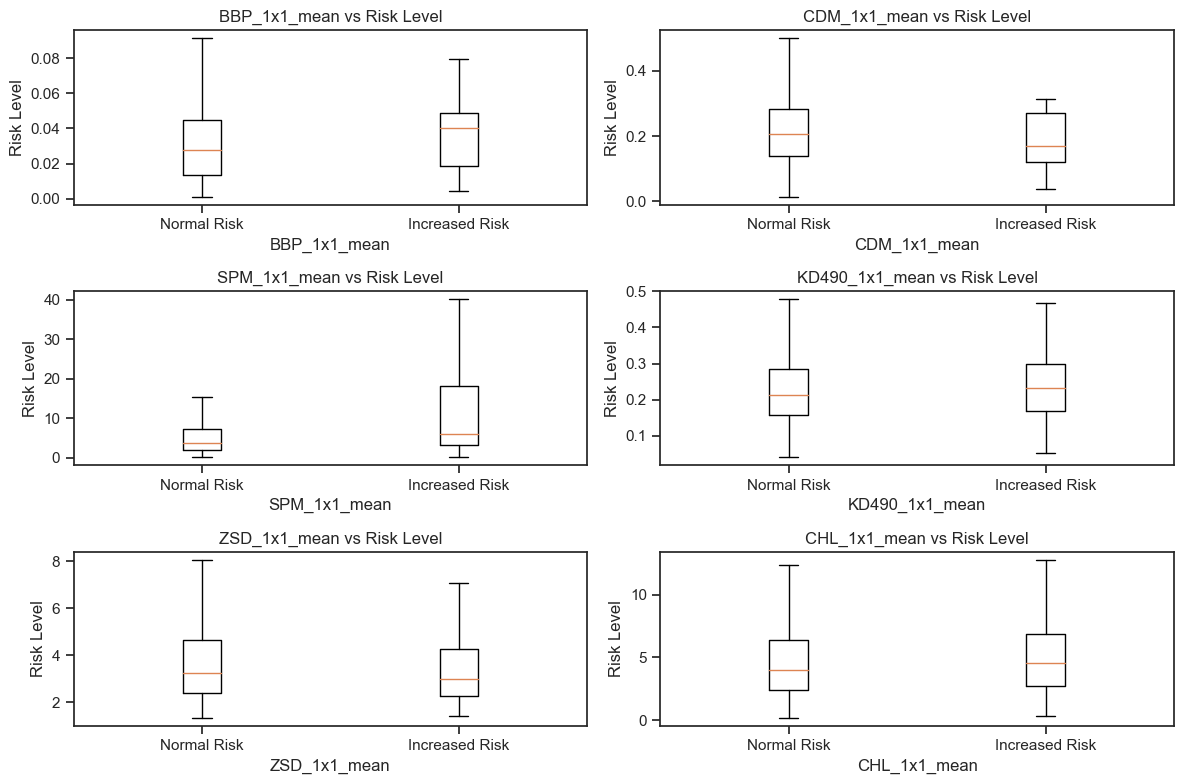

In [14]:
labels = [x for x in joined_df.columns if '1x1_mean' in x]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))

for i, column in enumerate(labels):
    row = i // 2
    col = i % 2
    
    ax = axes[row, col]
    ax.boxplot([joined_df.loc[joined_df["riskLevelLabel"] == 0, labels[i]].dropna(),
                joined_df.loc[joined_df["riskLevelLabel"] == 1, labels[i]].dropna()],
               labels=["Normal Risk", "Increased Risk"], showfliers=False)
    ax.set_xlabel(labels[i])
    ax.set_ylabel("Risk Level")
    ax.set_title(f"{column} vs Risk Level")

plt.tight_layout()

## 15x15 window sized mean

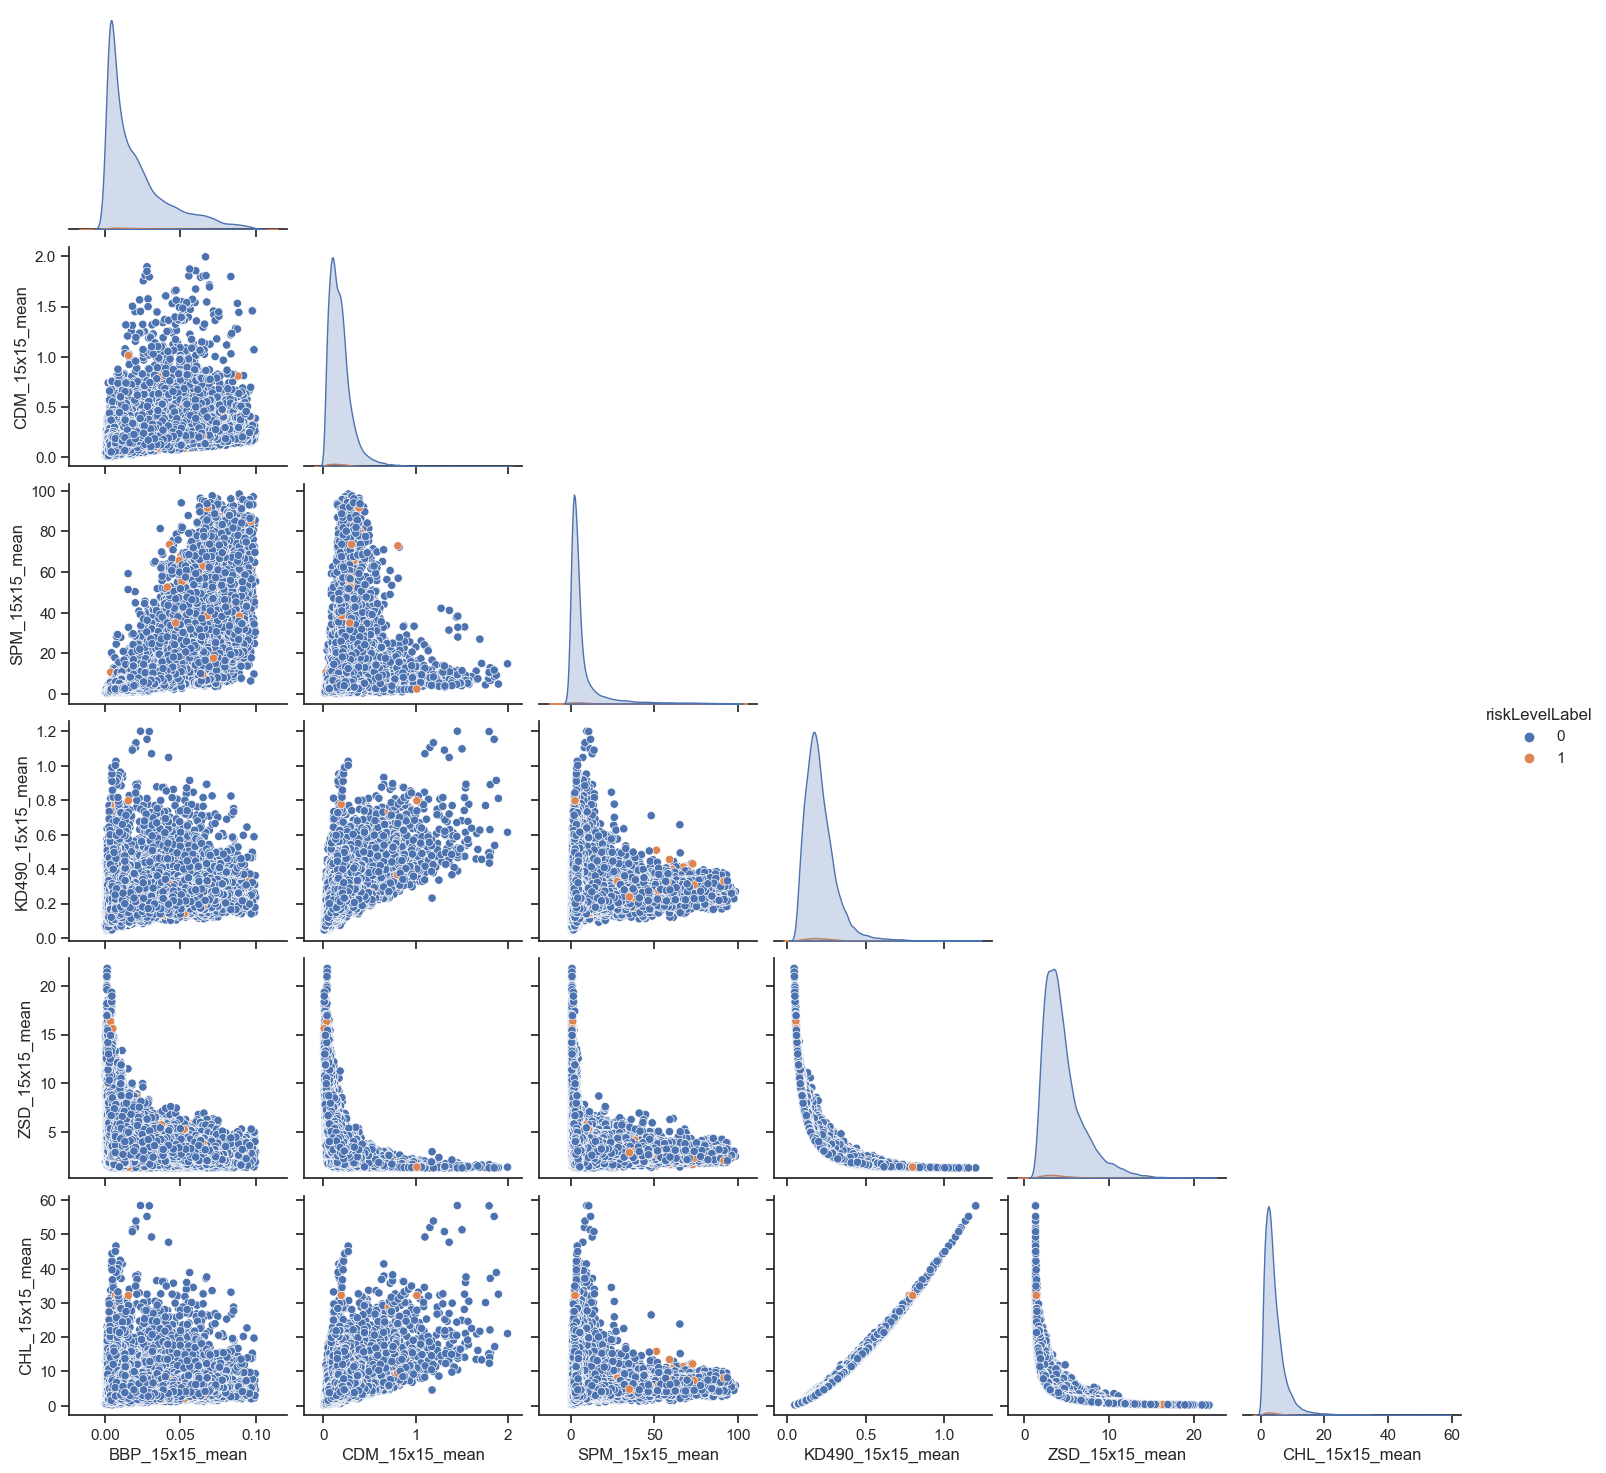

In [15]:
corr_columns = ['riskLevelLabel'] + [col for col in joined_df.columns if col.endswith('15x15_mean')]
subset_df = joined_df[corr_columns].dropna()

sns.set(style='ticks')
sns.pairplot(subset_df, hue='riskLevelLabel', corner=True)

plt.show()

In [16]:
# Pearson Correlation
subset_df.corr(method='pearson')

,riskLevelLabel,BBP_15x15_mean,CDM_15x15_mean,SPM_15x15_mean,KD490_15x15_mean,ZSD_15x15_mean,CHL_15x15_mean
riskLevelLabel,1.000000,0.032010,-0.003242,0.046843,-0.000639,-0.005669,-0.004170
BBP_15x15_mean,0.032010,1.000000,0.508157,0.766395,0.366317,-0.473491,0.280286
CDM_15x15_mean,-0.003242,0.508157,1.000000,0.319499,0.700315,-0.580069,0.657071
SPM_15x15_mean,0.046843,0.766395,0.319499,1.000000,0.266501,-0.328361,0.201250
KD490_15x15_mean,-0.000639,0.366317,0.700315,0.266501,1.000000,-0.753068,0.979433
ZSD_15x15_mean,-0.005669,-0.473491,-0.580069,-0.328361,-0.753068,1.000000,-0.629323
CHL_15x15_mean,-0.004170,0.280286,0.657071,0.201250,0.979433,-0.629323,1.000000


In [17]:
# Kendall Correlation
subset_df.corr(method='kendall')

,riskLevelLabel,BBP_15x15_mean,CDM_15x15_mean,SPM_15x15_mean,KD490_15x15_mean,ZSD_15x15_mean,CHL_15x15_mean
riskLevelLabel,1.000000,0.031102,-0.001152,0.041123,0.004174,-0.009807,0.002654
BBP_15x15_mean,0.031102,1.000000,0.446169,0.778986,0.354874,-0.419085,0.337740
CDM_15x15_mean,-0.001152,0.446169,1.000000,0.447615,0.574460,-0.606696,0.563531
SPM_15x15_mean,0.041123,0.778986,0.447615,1.000000,0.399019,-0.460854,0.382141
KD490_15x15_mean,0.004174,0.354874,0.574460,0.399019,1.000000,-0.914958,0.977719
ZSD_15x15_mean,-0.009807,-0.419085,-0.606696,-0.460854,-0.914958,1.000000,-0.892753
CHL_15x15_mean,0.002654,0.337740,0.563531,0.382141,0.977719,-0.892753,1.000000


In [18]:
# Spearman Correlation
subset_df.corr(method='spearman')

,riskLevelLabel,BBP_15x15_mean,CDM_15x15_mean,SPM_15x15_mean,KD490_15x15_mean,ZSD_15x15_mean,CHL_15x15_mean
riskLevelLabel,1.000000,0.038092,-0.001411,0.050364,0.005112,-0.012011,0.003251
BBP_15x15_mean,0.038092,1.000000,0.635494,0.935255,0.496012,-0.587585,0.470761
CDM_15x15_mean,-0.001411,0.635494,1.000000,0.639639,0.763414,-0.797802,0.750809
SPM_15x15_mean,0.050364,0.935255,0.639639,1.000000,0.559446,-0.643488,0.535405
KD490_15x15_mean,0.005112,0.496012,0.763414,0.559446,1.000000,-0.980702,0.998448
ZSD_15x15_mean,-0.012011,-0.587585,-0.797802,-0.643488,-0.980702,1.000000,-0.969490
CHL_15x15_mean,0.003251,0.470761,0.750809,0.535405,0.998448,-0.969490,1.000000


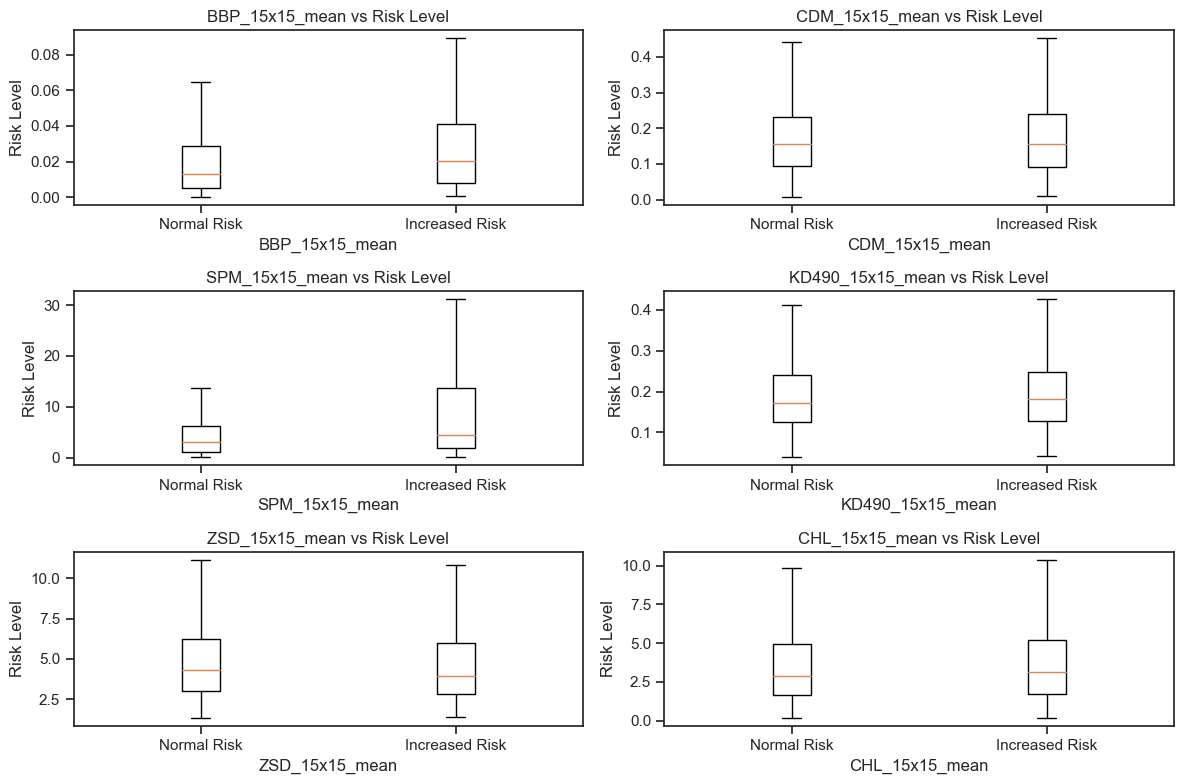

In [20]:
labels = [x for x in joined_df.columns if '15x15_mean' in x]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))

for i, column in enumerate(labels):
    row = i // 2
    col = i % 2
    
    ax = axes[row, col]
    ax.boxplot([joined_df.loc[joined_df["riskLevelLabel"] == 0, labels[i]].dropna(),
                joined_df.loc[joined_df["riskLevelLabel"] == 1, labels[i]].dropna()],
               labels=["Normal Risk", "Increased Risk"], showfliers=False)
    ax.set_xlabel(labels[i])
    ax.set_ylabel("Risk Level")
    ax.set_title(f"{column} vs Risk Level")

plt.tight_layout()